In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import pandas as pd
import h5py
import os
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image, display_png
import csv
#import pydotplus as pdp

from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

/usr/local/pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
dic_type={}
dic_type[1]="str"
dic_type[2]="str"
for i in range(3,11691):
    dic_type[2]="float64"

In [3]:
ft2=pd.read_table("GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct", sep="\t", header=2,dtype=dic_type)

In [17]:
print(merged_tsv3.iloc[1:80,:].values)

[[0.9523401088197916 0.0 1.7339167843419694 ... 0.0 0.0 0.0]
 [0.0 0.0 0.7452293606682078 ... 0.0 0.0 0.0]
 [0.0 0.0 2.9162661613050176 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 28.43705157723342 ... 0.0 0.0 0.0]
 [0.0 0.0 0.9253910505345556 ... 0.0 0.0 0.0]
 [0.8666048035450141 0.0 1.5797158401172011 ... 0.0 0.0 0.0]]


In [18]:
#分割して保存
np.save("TCGA-ACC.htseq_fpkm.npy",merged_tsv3.iloc[1:80,:].values)

In [19]:
merged_tsv3.iloc[1:80,:].shape
#np.save("train.npy",ft4)
#np.save("test.npy",df4)

(79, 56202)

In [34]:
ft4=np.load("train.npy")
df4=np.load("test.npy")

In [7]:
def zscore_wd(x, axis = None):
    xmean = x.mean(axis=axis, keepdims=True)
    xstd  = np.std(x, axis=axis, keepdims=True)
    zscore = (x-xmean)/xstd
    return zscore

In [6]:
def zscore(x, axis = None):
    xmean = x.mean(axis=axis)#, keepdims=True)
    xstd  = np.std(x, axis=axis)#, keepdims=True)
    zscore = (x-xmean)/xstd
    return zscore

In [35]:
ft4_1=zscore_wd(ft4,axis=1)

In [36]:
del ft4

In [37]:
X_train, X_test, y_train, y_test =train_test_split(ft4_1,df4)
#print(ft3.shape,X_train.shape,y_train.shape)
#print(ft3.shape,X_train.shape,y_train.shape)

In [10]:
from keras.models import Sequential,optimizers
from keras.layers import Dense,Activation,Dropout
opt=optimizers.SGD(lr=0.01)
#opt=optimizers.rmsprop(lr=0.001)
X_train,X_valid=np.split(X_train,[6000])
y_train,y_valid=np.split(y_train,[6000])
model1=Sequential()
model1.add(Dropout(0.05,input_shape=(56202,)))
model1.add(Dense(2048))
#model1.add(Dense(2048,activation='relu'))
#model1.add(Dense(2048,activation='relu'))
#model1.add(Dense(1024,activation='relu'))
#model1.add(Dense(1024,activation='relu'))
model1.add(Dense(1024,activation='relu'))
#model1.add(Dense(1024,activation='relu'))
#model1.add(Dense(512,activation='relu'))
#model1.add(Dense(512,activation='relu'))
model1.add(Dense(512,activation='relu'))
#model1.add(Dense(256,activation='relu'))
#model1.add(Dense(256,activation='relu'))
model1.add(Dense(256,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(30))
model1.add(Activation("softmax"))
model1.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])
fit=model1.fit(X_train,y_train,epochs=100,batch_size=512,verbose=2,validation_data=(X_valid,y_valid),callbacks=[])
score=model1.evaluate(X_test,y_test,batch_size=64)

Using TensorFlow backend.
/usr/local/pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Train on 6000 samples, validate on 2766 samples
Epoch 1/100
 - 6s - loss: 3.4573 - acc: 0.1733 - val_loss: 3.1367 - val_acc: 0.2046
Epoch 2/100
 - 3s - loss: 2.7819 - acc: 0.2942 - val_loss: 2.8645 - val_acc: 0.2921
Epoch 3/100
 - 3s - loss: 2.1958 - acc: 0.4220 - val_loss: 1.8069 - val_acc: 0.4584
Epoch 4/100
 - 3s - loss: 1.7858 - acc: 0.5232 - val_loss: 1.3857 - val_acc: 0.5875
Epoch 5/100
 - 3s - loss: 1.4282 - acc: 0.6192 - val_loss: 1.5916 - val_acc: 0.6197
Epoch 6/100
 - 3s - loss: 1.2531 - acc: 0.6658 - val_loss: 1.0385 - val_acc: 0.7025
Epoch 7/100
 - 3s - loss: 1.0234 - acc: 0.7172 - val_loss: 1.0697 - val_acc: 0.7242
Epoch 8/100
 - 3s - loss: 0.9116 - acc: 0.7528 - val_loss: 0.8076 - val_acc: 0.7787
Epoch 9/100
 - 2s - loss: 0.8966 - acc: 0.7502 - val_loss: 0.9418 - val_acc: 0.7480
Epoch 10/100
 - 3s - loss: 0.8001 - acc: 0.7743 - val_loss: 0.8173 - val_acc: 0.7621
Epoch 11/100
 - 3s - loss: 0.7231 - acc: 0.7972 - val_loss: 0.5363 - val_acc: 0.8445
Epoch 12/100
 - 3s - loss:

Epoch 97/100
 - 3s - loss: 0.1148 - acc: 0.9670 - val_loss: 0.1947 - val_acc: 0.9454
Epoch 98/100
 - 3s - loss: 0.1337 - acc: 0.9565 - val_loss: 0.1586 - val_acc: 0.9508
Epoch 99/100
 - 3s - loss: 0.1235 - acc: 0.9612 - val_loss: 0.1457 - val_acc: 0.9588
Epoch 100/100
 - 3s - loss: 0.1333 - acc: 0.9555 - val_loss: 0.1569 - val_acc: 0.9530
2922/2922 [==============================] - 1s 272us/step


In [38]:
pred_y=model1.predict(X_test)

In [42]:
pred_y

array([[7.8565849e-05, 5.2899081e-04, 5.9074114e-06, ..., 5.6164332e-05,
        9.5769936e-10, 7.8548364e-06],
       [4.6994395e-05, 3.0082577e-07, 9.9767658e-06, ..., 2.1815984e-05,
        1.1969380e-03, 1.9048511e-04],
       [9.0014539e-05, 6.2284977e-07, 1.0362165e-03, ..., 9.8021201e-07,
        1.6960814e-05, 1.7668510e-05],
       ...,
       [9.2382598e-01, 3.1136055e-04, 1.3842146e-04, ..., 7.8635890e-04,
        3.2411808e-07, 3.7034761e-04],
       [2.0584758e-02, 1.8866463e-02, 4.2640488e-04, ..., 6.2244912e-03,
        5.4697580e-07, 2.9535935e-04],
       [1.5763009e-05, 6.7580413e-07, 6.2255145e-05, ..., 3.2493816e-07,
        8.9332485e-07, 1.5647569e-06]], dtype=float32)

In [40]:
np.sum(np.argmax(pred_y,axis=1)==np.argmax(y_test,axis=1))/pred_y.shape[0]

0.9637234770704997

In [13]:
print(X_test.shape)

(2922, 56202)


In [35]:
print(merged_tsv3.iloc[1:80,:].shape)

(79, 56202)


In [26]:
y_test[10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [7]:
del ft4

In [8]:
del X_train

In [ ]:
df2=pd.read_csv("answer.csv", delimiter="\t")
c = collections.Counter(df2["SMT"])

In [17]:
ft2=pd.read_table("GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct", sep="\t", header=2,dtype=dic_type)

In [23]:
ft2.head()

,Name,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
0,ENSG00000223972.4,DDX11L1,-0.082987,-0.058305,-0.051023,-0.050938,-0.031879,-0.036824,-0.046011,-0.064201,...,-0.007404,-0.023319,-0.012711,-0.010912,-0.019300,-0.013588,-0.032820,-0.012237,-0.016445,-0.026980
1,ENSG00000227232.4,WASH7P,0.016926,-0.022307,-0.002995,-0.027579,-0.018158,-0.017474,-0.019980,-0.015354,...,-0.005800,-0.006162,-0.008807,-0.007362,-0.010537,-0.007907,-0.010035,-0.003707,-0.009147,-0.007695
2,ENSG00000243485.2,MIR1302-11,-0.082743,-0.058475,-0.050949,-0.051004,-0.031774,-0.036920,-0.045736,-0.063786,...,-0.007408,-0.023464,-0.012786,-0.010847,-0.020043,-0.014089,-0.032945,-0.012531,-0.016621,-0.027120
3,ENSG00000237613.2,FAM138A,-0.083258,-0.058687,-0.050999,-0.050911,-0.031879,-0.036920,-0.045867,-0.064065,...,-0.007442,-0.023422,-0.012733,-0.010892,-0.020043,-0.014076,-0.033045,-0.012493,-0.016637,-0.027150
4,ENSG00000268020.2,OR4G4P,-0.083494,-0.058687,-0.051084,-0.051004,-0.031879,-0.036920,-0.045803,-0.064337,...,-0.007442,-0.023512,-0.012786,-0.010912,-0.020043,-0.014140,-0.032883,-0.012531,-0.016665,-0.027136


In [18]:
ft2.iloc[:,2:]=zscore(ft2.iloc[:,2:])

In [30]:
import collections
import matplotlib.pyplot as plt
tsv=pd.read_csv("patient_data/TCGA-BRCA.htseq_fpkm.tsv", delimiter="\t")
#change FPKM to TPM
tsv.iloc[:,1:]=1000000*tsv.iloc[:,1:]/tsv.iloc[:,1:].sum()
tsv.iloc[:,1:]=zscore(tsv.iloc[:,1:])
merge_tsv=pd.merge(tsv,ft2, left_on='Ensembl_ID', right_on='Name', how='right')
print(merge_tsv.shape)
#（先に正規化する）欠損値補完
merge_tsv2=merge_tsv.transpose()
del merge_tsv
merged_tsv3=merge_tsv2.fillna(merge_tsv2.iloc[tsv.shape[1]+2:,:].mean())

(56202, 12908)


In [45]:
tsv.iloc[:,1:].values.max()

443.3941976192535

In [50]:
%matplotlib inline

(array([1.3228e+04, 1.2950e+03, 1.0170e+03, 8.0000e+02, 5.4700e+02,
        2.1100e+02, 1.3300e+02, 5.4000e+01, 1.3000e+01, 2.0000e+00]),
 array([  0.        ,  22.7574954 ,  45.5149908 ,  68.27248621,
         91.02998161, 113.78747701, 136.54497241, 159.30246782,
        182.05996322, 204.81745862, 227.57495402]),
 <a list of 10 Patch objects>)

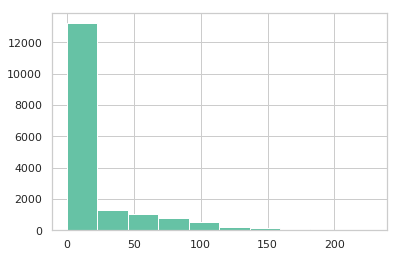

In [52]:
plt.hist(np.ravel(tsv.iloc[:100,1:].values))

(array([1.159424e+06, 5.700000e+03, 2.454000e+03, 9.140000e+02,
        2.140000e+02, 6.800000e+01, 1.400000e+01, 8.000000e+00,
        3.000000e+00, 1.000000e+00]),
 array([    0.,  2319.,  4638.,  6957.,  9276., 11595., 13914., 16233.,
        18552., 20871., 23190.]),
 <a list of 10 Patch objects>)

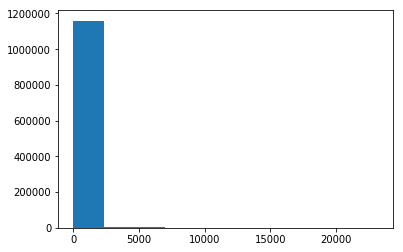

In [8]:
ft_2=ft2.iloc[:,2:].values
plt.hist(np.ravel(ft_2[:100]))

(array([1.154786e+06, 2.215000e+03, 3.781000e+03, 6.114000e+03,
        1.334000e+03, 2.590000e+02, 1.750000e+02, 1.000000e+02,
        2.800000e+01, 8.000000e+00]),
 array([-0.14161018,  2.35838785,  4.85838588,  7.3583839 ,  9.85838193,
        12.35837996, 14.85837798, 17.35837601, 19.85837404, 22.35837207,
        24.85837009]),
 <a list of 10 Patch objects>)

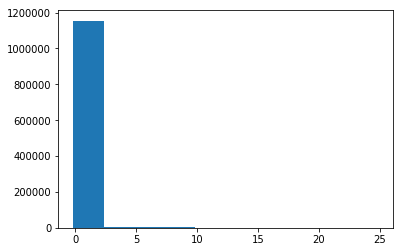

In [12]:
ft_2=ft2.iloc[:,2:].values
plt.hist(np.ravel(ft_2[:100]))

In [20]:
#merged_tsv3.iloc[1:tsv.shape[1],:]=zscore(merged_tsv3.iloc[1:tsv.shape[1],:],axis=1)

/usr/local/pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/generic.py:7460: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return_indexers=True)


In [ ]:
print(predict_patient_class)

[[0.03084153 0.05152826 0.03824987 0.01915345 0.02869049 0.03705398
  0.03073423 0.04619122 0.06621089 0.02316705 0.03007476 0.03789276
  0.03399127 0.01226228 0.02112894 0.02521734 0.0182472  0.02484677
  0.05585054 0.05030451 0.03468984 0.04043013 0.04278166 0.04063409
  0.01992454 0.03325509 0.02610402 0.03494615 0.02264925 0.02294794]
 [0.02984001 0.06633385 0.03166134 0.01591626 0.02713329 0.03128687
  0.03001847 0.03283976 0.04437128 0.02257097 0.02465075 0.03358926
  0.05473162 0.00908673 0.02143227 0.03581508 0.01988412 0.02453263
  0.04678056 0.06492356 0.03169412 0.04593873 0.04976695 0.03164602
  0.01736484 0.04155405 0.02941744 0.03513893 0.02685047 0.02322981]
 [0.03238828 0.06776663 0.04509059 0.02228184 0.02701108 0.03247658
  0.03048033 0.04693434 0.04835776 0.023972   0.02022508 0.04249083
  0.04295889 0.01389753 0.01979078 0.02833918 0.01890195 0.02223212
  0.03996177 0.04940534 0.02857809 0.03659882 0.04771941 0.03460735
  0.01854009 0.03912353 0.02962263 0.04151326 

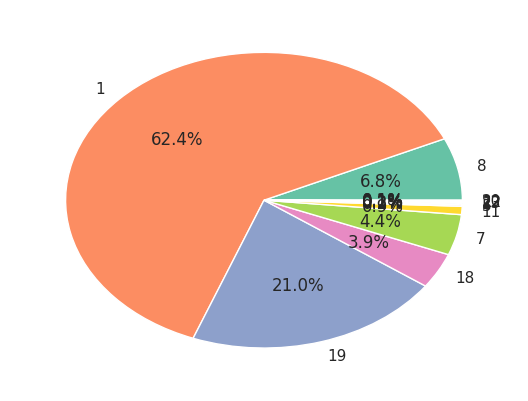

In [31]:
#predict
del merge_tsv2
predict_patient_classes=model1.predict(merged_tsv3.iloc[1:tsv.shape[1],:].values)
print(predict_patient_classes[:3])
del merged_tsv3
print(np.argmax(predict_patient_classes,axis=1))
pre_data=np.argmax(predict_patient_classes,axis=1).astype(np.int32)
del predict_patient_classes 
np.savetxt("TCGA-BRCA.htseq_fpkm.csv",pre_data,delimiter=',')
c = collections.Counter(pre_data)
print(c)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set2')

c_d=dict(c)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.pie(c_d.values(), labels=c_d.keys(), autopct="%1.1f%%")

plt.show()
##モデルの形と違っているのでおこられている
#おそらくmergeのあとで変化、、ft2ではあってる）
#mergeチェック、これもkillされているのでもういちっどモデルからやり直す

In [ ]:
print()

In [33]:
import sys
print("{}{:>25}{:>10}{}".format('|','valuable name','|','memory','|'))
print("-------")
for var in dir():
    if not var.startswith("_") and sys.getsizeof(eval(var))>10000:
        print("{}{:>25}{:>10}{}".format('|',var,'|',sys.getsizeof(eval(var)),'|'))

|            valuable name         |memory
-------
|                      df4         |2805232
|                      ft2         |5262955875
|                   pred_y         |350752
|                      tsv         |593349469
|                   y_test         |701392


In [15]:
del ft4_1

In [16]:
del X_test

In [26]:
df4

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [1]:
ls

GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct/
GTEx_v7_Annotations_SampleAttributesDS.txt
TCGA-ACC.htseq_fpkm.npy
answer.csv
chap04_homework.ipynb
deeplearning.ipynb
file.ipynb
file_model.ipynb
patient/
patient data/
patient_model.ipynb
patient_model_apply.ipynb
test.npy
train.npy
